## **K Nearest Neighbors Classifier** 

- The k-Nearest Neighbors (k-NN) algorithm is a simple, yet highly effective, supervised machine learning technique used for classification and regression tasks. It operates on the principle that similar data points are likely to have similar outputs. In classification, k-NN assigns a class to a data point based on the majority class among its k closest neighbors in the feature space. The "closeness" is typically measured using distance metrics such as Euclidean, Manhattan, or Minkowski distances. Despite its simplicity, k-NN is powerful and versatile, requiring no assumptions about data distribution.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Shapes 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [29]:
# Define the k-NN model with custom hyperparameters
model = KNeighborsClassifier(
    n_neighbors=3,  # Number of neighbors to use
    weights='uniform',  # Weight function used in prediction
    algorithm='auto',  # Algorithm used to compute the nearest neighbors
    metric='minkowski',  # Distance metric to use
    p=1  # Power parameter for the Minkowski metric
)

In [30]:
# Measure the training time
start_time = time.time()

print("Starting training...")

# Train the model
model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

Starting training...
Training completed in 0.14 seconds


In [31]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9135790005047956


In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)

Confusion Matrix: [[1956   27   16    7    4    4    8    1    8    2    5    4]
 [  23 1293    0   37   27    3    5   26  107   17    9    0]
 [   8   28  960    3    5    1    0    0    2    0    1    2]
 [   2   17    0  326   14    1    2    2   10    1    1    0]
 [   3   21    0   14  339    0    3   14   20    4    3    0]
 [   2    0    0    1    0  274    7    1    0    4   14    0]
 [   3    7    0    1    2    7  532    1    3    1    6    0]
 [   0    4    0   16    5    1    4  348   13    5    6    0]
 [  10   39    0   15   17    1    3   15  670    9    1    0]
 [   0    4    1    1    6    3    2    4    3  234    5    0]
 [   4    7    0    1    1    7    4    5    6    9  324    0]
 [   4   20    1    1    1    0    1    1    7    0    1 1793]]


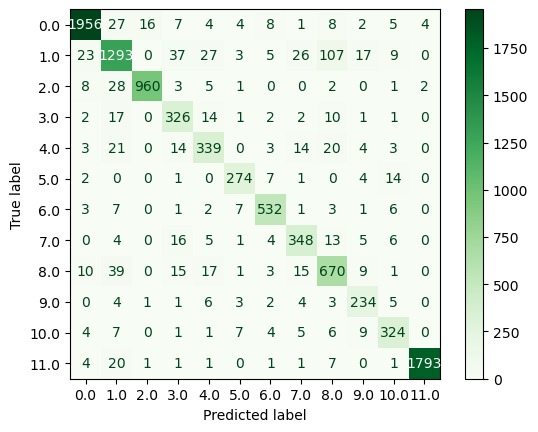

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

**Save the model**

In [35]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "knn_model.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(model, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\knn_model.pkl
